<a href="https://colab.research.google.com/github/PedroMeloo/HousePricesKaggle/blob/main/House_Prices_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Prices Kaggle Challenge
My resolution of the House Prices Challenge, there's some metrics and studying codes in the middle to show how I thought while resolving this.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [87]:
dataset = pd.read_csv('train.csv')

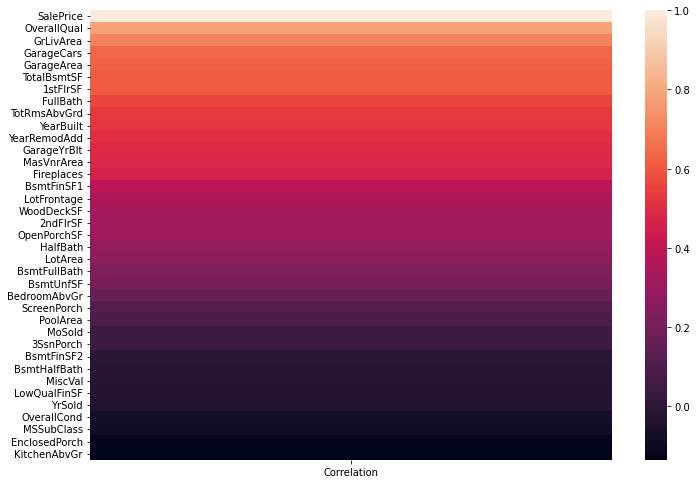

In [88]:
dataset_withoutId = dataset.drop(['Id'], axis=1)

price_correlation = dataset_withoutId.corrwith(dataset_withoutId['SalePrice'], method='pearson')
tablecorrelation = price_correlation.sort_values(ascending = False)
tablecorrelation = pd.DataFrame(tablecorrelation)
tablecorrelation = tablecorrelation.rename(columns={0: 'Correlation'})

#teste = tablecorrelation.reset_index('Variables')

rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(tablecorrelation)

##*Drops*

In [89]:
#Dropping columns because of low correlation

filtered_dataset = dataset.drop([
                     'MSSubClass',
                     'BsmtFinSF2',
                     'LowQualFinSF',
                     'BsmtHalfBath',
                     'KitchenAbvGr',
                     'EnclosedPorch',
                     '3SsnPorch',
                     'ScreenPorch',
                     'PoolArea', #A lot of 0 values
                     'MiscVal',
                     'MoSold',
                     'YrSold'], axis = 1)

#Dropping Columns because of low data
filtered_dataset = filtered_dataset.drop(['PoolQC',
                     'Fence',
                     'MiscFeature'],axis = 1)

#Dropping Quality/Condition Columns because they are not objective and measurable data
filtered_dataset = filtered_dataset.drop(['OverallQual',
                             'OverallCond',
                             'ExterQual',
                             'ExterCond',
                             'BsmtQual',
                             'BsmtCond',
                             'HeatingQC',
                             'KitchenQual',
                             'FireplaceQu',
                             'GarageQual',
                             'GarageCond',
                             'BsmtFinType1',
                             'BsmtFinType2'], axis = 1)

#Drop because of low feature importance (this can be seen in the 'Feature Importance' part )
filtered_dataset = filtered_dataset.drop(['PavedDrive',
                                          'Street',
                                          'Utilities',
                                          'Electrical',
                                          'Foundation',
                                          'Condition1',
                                          'Condition2',
                                          'LandContour',
                                          'Heating',
                                          'RoofMatl',
                                          'LotConfig',
                                          'LandSlope',
                                          'SaleType',
                                          'BsmtExposure',
                                          'RoofStyle',
                                          'Exterior1st',
                                          'Exterior2nd',
                                          'LotShape',
                                          'GarageFinish',
                                          'GarageType',
                                          'Functional',
                                          'HouseStyle',
                                          'BldgType',
                                          'MasVnrType'], axis = 1)



#Dropping outliers
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['LotFrontage'] > 125].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['LotArea'] > 30000].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['YearBuilt'] < 1900].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['BsmtFinSF1'] > 1400].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['TotalBsmtSF'] > 2500].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['1stFlrSF'] > 2500].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['2ndFlrSF'] > 2500].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['GrLivArea'] > 3000].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['GarageArea'] > 1000].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['WoodDeckSF'] > 520].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['OpenPorchSF'] > 300].index)
filtered_dataset = filtered_dataset.drop(filtered_dataset[filtered_dataset['MasVnrArea'] > 600].index)


##*Replacing data*


In [90]:
#SaleCondition
filtered_dataset['SaleCondition'].replace('Abnorml', 'Not-Normal',inplace=True)
filtered_dataset['SaleCondition'].replace('AdjLand', 'Not-Normal',inplace=True)
filtered_dataset['SaleCondition'].replace('Alloca', 'Not-Normal',inplace=True)
filtered_dataset['SaleCondition'].replace('Family', 'Not-Normal',inplace=True)
filtered_dataset['SaleCondition'].replace('Partial', 'Not-Normal',inplace=True)

filtered_dataset.fillna('SemValor', inplace=True)
filtered_dataset['LotFrontage'].replace('SemValor', 0, inplace=True)
filtered_dataset['GarageYrBlt'].replace('SemValor', 0, inplace=True)
filtered_dataset['MasVnrArea'].replace('SemValor', 0, inplace=True)

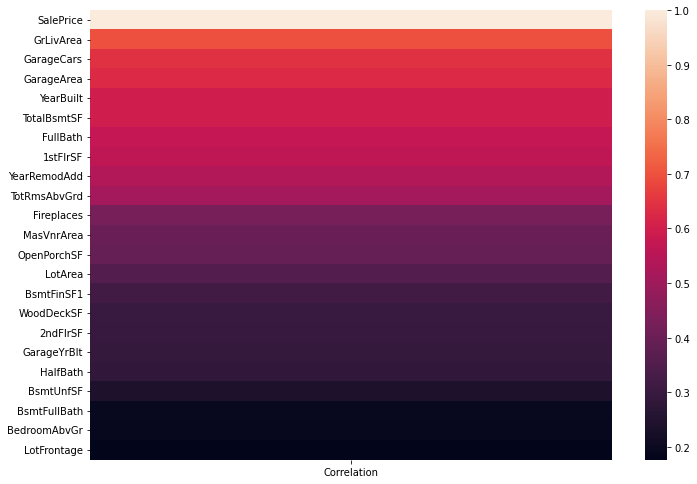

In [91]:
filtered_dataset_withoutId = filtered_dataset.drop(['Id'], axis=1)

price_corr = filtered_dataset_withoutId.corrwith(filtered_dataset_withoutId['SalePrice'], method='pearson')
tablecorr = price_corr.sort_values(ascending = False)
tablecorr = pd.DataFrame(tablecorr)
tablecorr = tablecorr.rename(columns={0: 'Correlation'})

rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(tablecorr)

##*Dummy Variables*


In [92]:
#Categorical data to Dummy variables
df_dummy = pd.get_dummies(filtered_dataset, columns=
                               ['MSZoning',
                                'Alley',
                                'CentralAir',
                                'SaleCondition',
                                'Neighborhood'])


#**Model**
XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

In [93]:
dataset_model = df_dummy.drop(['Id'], axis = 1)

##*X and y*

In [94]:
X = dataset_model.loc[:, dataset_model.columns != 'SalePrice']
y = dataset_model.loc[:,['SalePrice']]

##*Train and Test sets*

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

##*Finding the best hyperparameters*

In [96]:
#import xgboost as xgb
#from xgboost import XGBRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import uniform as sp_randFloat
#from scipy.stats import randint as sp_randInt

#Using RandomizedSearchCV to find the best hyperparameters

#regressor = XGBRegressor()
#parameters = {'n_estimators':  sp_randInt(500,1000), 
#             'random_state':  [0], 
#             'max_depth': sp_randInt(2, 8),
#             'learning_rate': sp_randFloat(loc = 0, scale = 0.05),
#              'subsample': sp_randFloat(loc = 0, scale = 1)}

#random = RandomizedSearchCV(estimator = regressor, 
#                    param_distributions = parameters,
#                    scoring = 'r2',
#                    cv = 5,
#                    n_iter = 50)

#random.fit(X_train, y_train)

##**Fitting my model**

In [97]:
import xgboost as xgb
from xgboost import XGBRegressor

#Best hyperparameters were find using RandomizedSearchCV as shown above

regressor = XGBRegressor(learning_rate =  0.0250363099079616,
                          max_depth = 4,
                          n_estimators = 828,
                          subsample = 0.276201205941224,
                          random_state = 0)

regressor.fit(X_train, y_train)

[20:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.0250363099079616, max_depth=4, n_estimators=828,
             subsample=0.276201205941224)

In [98]:
y_pred = regressor.predict(X_test)


##*Metrics*

In [99]:
#CrossValidation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv = 5)

[20:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
print(f'Final scores using CrossValidation: {scores}\nMean scores: {scores.mean()}\nScores standard deviation: {scores.std()}')

Final scores using CrossValidation: [0.88659461 0.92260983 0.86586078 0.87375111 0.85734295]
Mean scores: 0.8812318565328393
Scores standard deviation: 0.02282019919217589


In [101]:
print(f'Calculating the score only one time: {regressor.score(X, y)}')

Calculating the score only one time: 0.9616653171434215


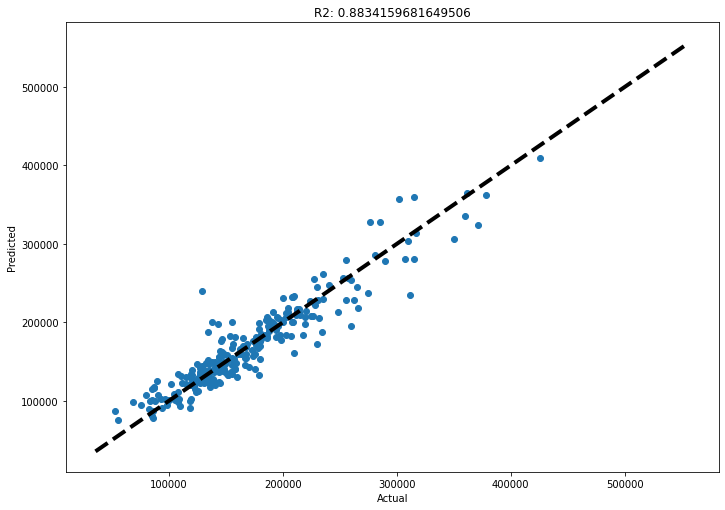

In [102]:
from sklearn.metrics import r2_score


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))

plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#MSE gives larger penalization to big prediction error by square

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}\nMean Asbolute Error: {mean_absolute_error(y_test, y_pred)}')



Mean Squared Error: 20828.708487031243
Mean Asbolute Error: 14570.781636169202


###*Feature Importance*

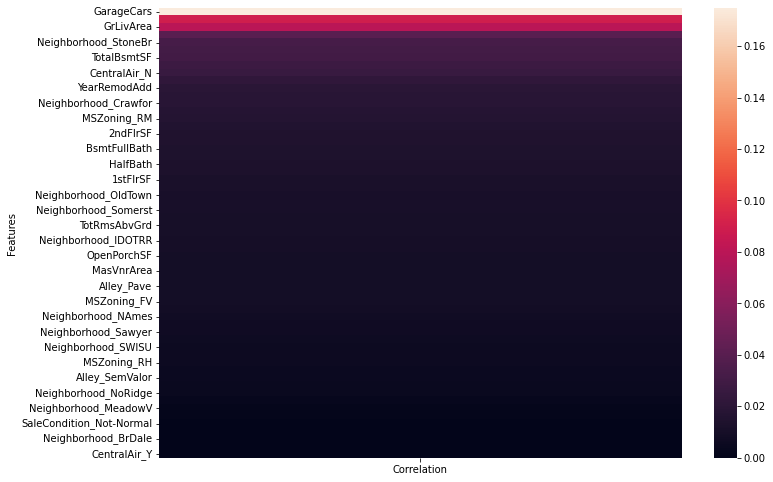

In [108]:
attributes = list(X_train)

featureimp = pd.DataFrame(sorted(zip(regressor.feature_importances_, attributes), reverse=True))

featureimp = featureimp.rename(columns={0: 'Correlation',
                                      1: 'Features'})
featureimp.set_index('Features', inplace=True)
sns.heatmap(featureimp)

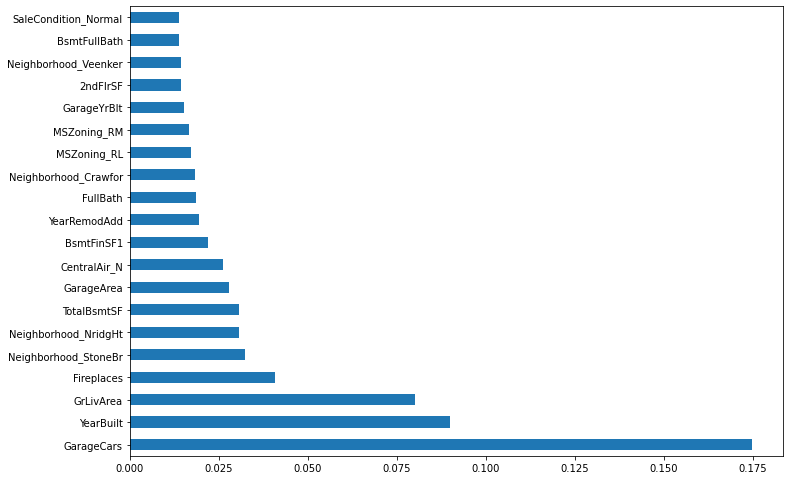

In [70]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

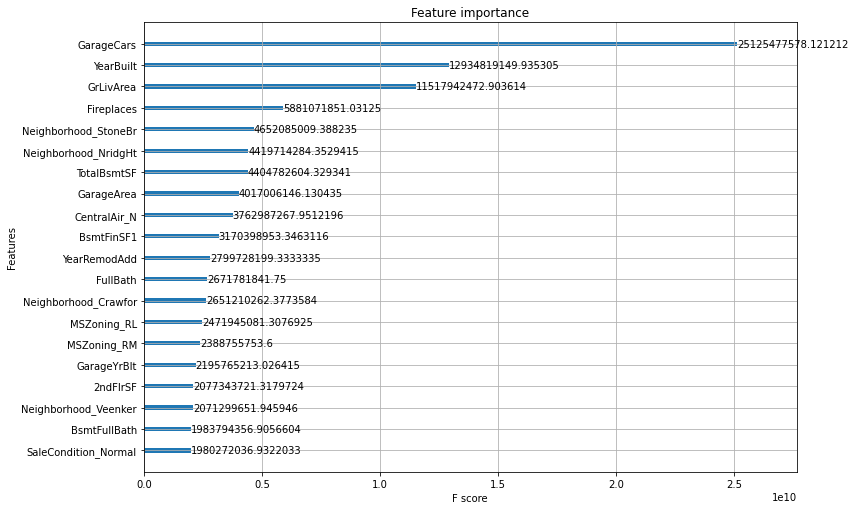

In [71]:
xgb.plot_importance(regressor, max_num_features= 20, importance_type='gain')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [85]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from sklearn.metrics import r2_score

n_variables = []
accuracy = []
n_variable = len(dataset_model.columns)

thresholds = sort(regressor.feature_importances_) 

for thresh in thresholds:
  selection = SelectFromModel(regressor, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  selection_model = XGBRegressor(objetive = 'reg:squarederror', 
                                 learning_rate =  0.0250363099079616,
                                  max_depth = 4,
                                  n_estimators = 828,
                                  subsample = 0.276201205941224,
                                  random_state = 0,
                                 verbosity=0)
  
  selection_model.fit(select_X_train, y_train)
  select_X_test = selection.transform(X_test)
  new_y_pred = selection_model.predict(select_X_test)
  new_r2 = r2_score(y_test, new_y_pred)
  n_variables.append(n_variable)
  n_variable -= 1
  accuracy.append(new_r2)

  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], new_r2*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=59, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=59, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=59, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=59, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=59, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=54, Accuracy: 88.34%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=53, Accuracy: 88.59%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.003, n=52, Accuracy: 88.65%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=51, Accuracy: 88.62%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=50, Accuracy: 88.68%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=49, Accuracy: 88.53%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=48, Accuracy: 88.52%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=47, Accuracy: 88.26%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=46, Accuracy: 88.39%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=45, Accuracy: 88.30%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=44, Accuracy: 88.67%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=43, Accuracy: 88.07%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=42, Accuracy: 87.96%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.008, n=41, Accuracy: 88.04%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.008, n=40, Accuracy: 87.75%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=39, Accuracy: 87.32%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=38, Accuracy: 87.36%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=37, Accuracy: 87.18%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=36, Accuracy: 87.13%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=35, Accuracy: 86.86%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=34, Accuracy: 87.50%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=33, Accuracy: 87.39%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.010, n=32, Accuracy: 86.61%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.010, n=31, Accuracy: 86.66%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=30, Accuracy: 86.91%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=29, Accuracy: 86.69%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=28, Accuracy: 86.64%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=27, Accuracy: 86.71%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=26, Accuracy: 86.75%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=25, Accuracy: 86.72%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=24, Accuracy: 86.49%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=23, Accuracy: 86.41%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.013, n=22, Accuracy: 87.11%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.013, n=21, Accuracy: 86.67%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=20, Accuracy: 86.52%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=19, Accuracy: 86.48%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=18, Accuracy: 86.36%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=17, Accuracy: 86.41%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=16, Accuracy: 86.43%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.017, n=15, Accuracy: 86.11%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.017, n=14, Accuracy: 85.89%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.018, n=13, Accuracy: 85.73%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=12, Accuracy: 84.13%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=11, Accuracy: 84.38%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=10, Accuracy: 84.14%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.026, n=9, Accuracy: 82.36%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.028, n=8, Accuracy: 81.90%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.031, n=7, Accuracy: 81.01%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.031, n=6, Accuracy: 74.38%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.032, n=5, Accuracy: 74.00%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.041, n=4, Accuracy: 72.65%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.080, n=3, Accuracy: 70.20%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.090, n=2, Accuracy: 55.00%
Thresh=0.175, n=1, Accuracy: 46.67%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


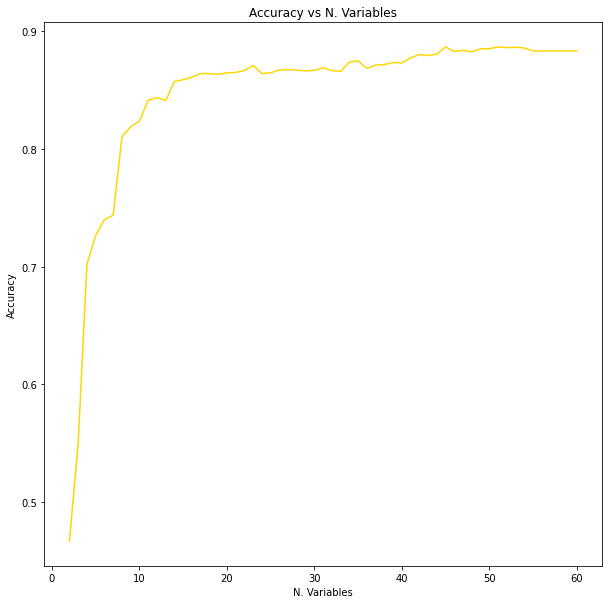

In [84]:
plt.plot(n_variables, accuracy, color='gold')
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Accuracy vs N. Variables')
plt.xlabel('N. Variables')
plt.ylabel('Accuracy')
plt.show()